## Predicting Early Readmission in Diabetic Patients

### Project Overview
This project analyzes ten years (1999–2008) of clinical care data from 130 US hospitals and integrated delivery networks. The dataset focuses on diabetic patients who received inpatient care—including lab work, medications, and short hospital stays (up to 14 days). The goal is to predict whether a patient will be readmitted within 30 days of discharge.

#### Why This Matters
Think of it like this: If someone with diabetes goes to the hospital and is sent home too early or without the right care, they might get worse and have to come back. That’s bad for their health and expensive for everyone involved.

This research helps us figure out how to prevent that from happening in the first place.

Even though we know how to improve outcomes for diabetic patients, many still don’t receive proper care during their hospital stay. This project aims to highlight patterns in the data that can be used to flag high-risk patients before discharge—so hospitals can intervene early and reduce unnecessary readmissions.



### Objectives
1. Explore and clean real-world hospital data

2. Identify key features influencing early readmission

3. Train and evaluate machine learning models to predict readmission risk

4. Provide insights to help improve diabetic patient care and hospital efficiency



### Dataset
Source: UCI Machine Learning Repository - Diabetes 130-US hospitals dataset

Size: 100,000+ patient records

Features include demographics, lab tests, medications, diagnosis codes, length of stay, and discharge outcomes

The final model can help hospitals:

Identify patients at risk of early readmission

Improve discharge planning and follow-up care

Reduce healthcare costs and improve patient outcomes



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [2]:
diabetes = pd.read_csv('diabetic_data.csv')
diabetes.shape

(101766, 50)

Let us check out the state of our dataset.

In [3]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

The data could be having "?" as a place filler for null values.

In [5]:
diabetes.apply(lambda col: (col == '?').sum()).sort_values(ascending=False)


weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
encounter_id                    0
tolazamide                      0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
citoglipton                     0
examide                         0
acetohexamide                   0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
glipizide                       0
repaglinide                     0
glimepiride   

In [6]:
diabetes.replace('?', np.nan, inplace=True)

Let us check categorical columns with many unique values

In [7]:
for col in diabetes.columns:
    if diabetes[col].dtype == 'object':
        unique_vals = diabetes[col].nunique()
        if unique_vals < 20:
            print(f"{col}: {diabetes[col].unique()}")

race: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight: [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code: [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
max_glu_serum: [nan '>300' 'Norm' '>200']
A1Cresult: [nan '>7' '>8' 'Norm']
metformin: ['No' 'Steady' 'Up' 'Down']
repaglinide: ['No' 'Up' 'Steady' 'Down']
nateglinide: ['No' 'Steady' 'Down' 'Up']
chlorpropamide: ['No' 'Steady' 'Down' 'Up']
glimepiride: ['No' 'Steady' 'Down' 'Up']
acetohexamide: ['No' 'Steady']
glipizide: ['No' 'Steady' 'Up' 'Down']
glyburide: ['No' 'Steady' 'Up' 'Down']
tolbutamide: ['No' 'Steady']
pioglitazone: ['No' 'Steady' 'Up' 'Down']
rosiglitazone: ['No' 'Steady' 'Up' 'Down']
acarbose: ['No' 'Steady' 'Up' 'Down']
miglitol: ['No' 'Stead

Since we will be looking at the readmitted coulumn, we can simplify it so that if Readmitted ="<30" we have a 1 if else we have a 0.(Yes or No)

In [8]:
# Binary target: 1 if readmitted within 30 days, else 0
diabetes['readmit_30'] = diabetes['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [9]:
diabetes.drop(['weight', 'payer_code', 'encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [10]:
diabetes.duplicated().sum()

0

In [11]:
diabetes.isnull().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone  

In [12]:
diabetes['medical_specialty'].fillna('Unknown', inplace=True)
diabetes['race'].fillna('Unknown', inplace=True)

In [13]:
diabetes.isnull().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone  

In [14]:
diabetes["diag_2"].dtype

dtype('O')

In [15]:
diabetes['diag_1'].fillna('Missing', inplace=True)
diabetes['diag_2'].fillna('Missing', inplace=True)
diabetes['diag_3'].fillna('Missing', inplace=True)

### Exploratory Data Analysis

Here we will be trying to understand the structure of our data, discover patterns, relationships and outliers and generate insights and hypotheses before modelling.

1. Target Variable Distribution: Check for balance of readmissions.

Text(0.5, 1.0, 'Readmission Categories')

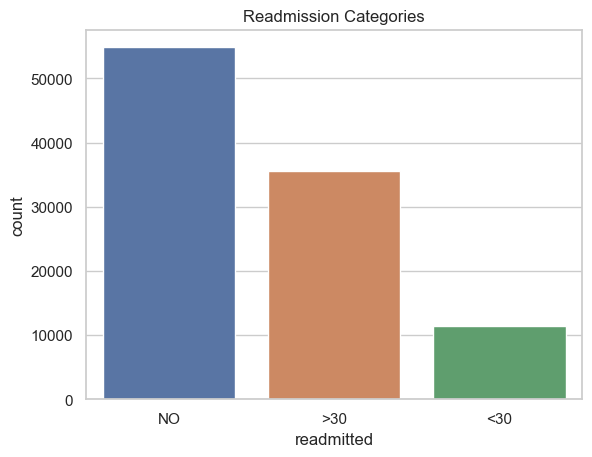

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizing the distribution of readmission categories
sns.countplot(data=diabetes, x='readmitted')
plt.title('Readmission Categories')

Text(0.5, 1.0, 'Readmitted within 30 Days (0 = No, 1 = Yes)')

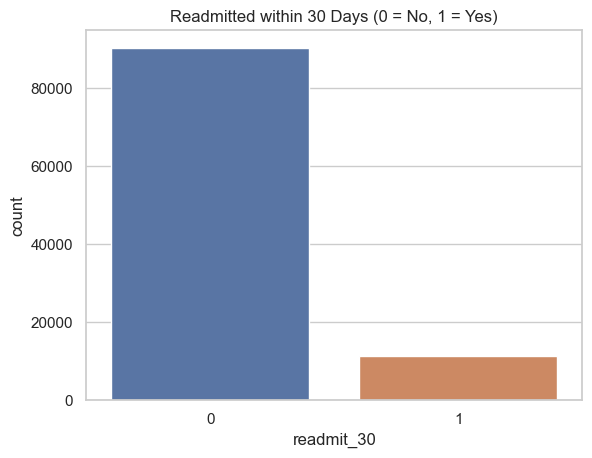

In [17]:
# Visualizing the binary target for readmission within 30 days
sns.countplot(data=diabetes, x='readmit_30')
plt.title('Readmitted within 30 Days (0 = No, 1 = Yes)')

2. Univariate Analysis

Let us look at key features individually.

<Axes: title={'center': 'Race Distribution'}, xlabel='race'>

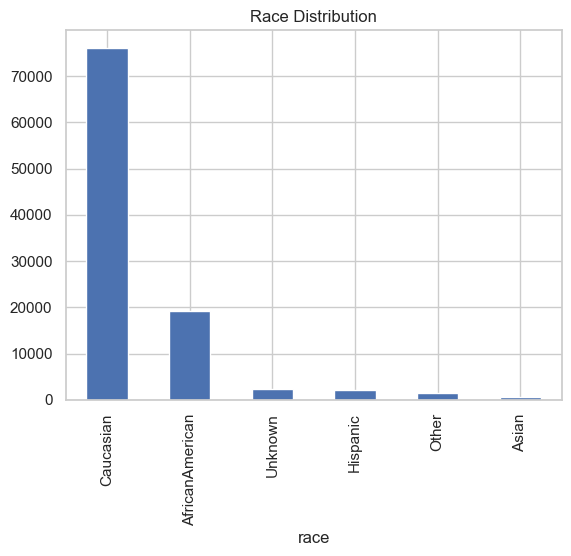

In [18]:
# Categorical
diabetes['race'].value_counts().plot(kind='bar', title='Race Distribution')


<Axes: title={'center': 'Admission Types'}, xlabel='admission_type_id'>

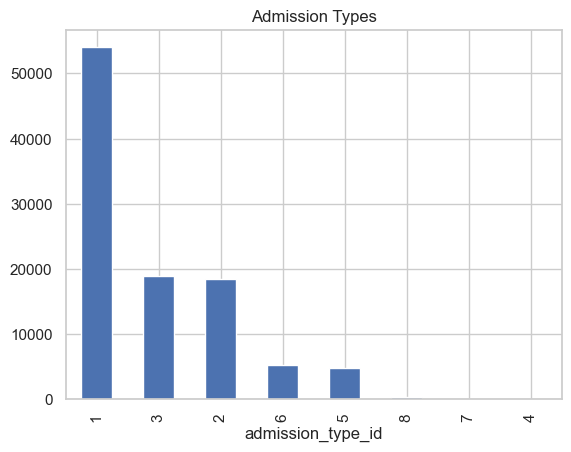

In [19]:
diabetes['admission_type_id'].value_counts().plot(kind='bar', title='Admission Types')

Text(0.5, 1.0, 'Number of Medications')

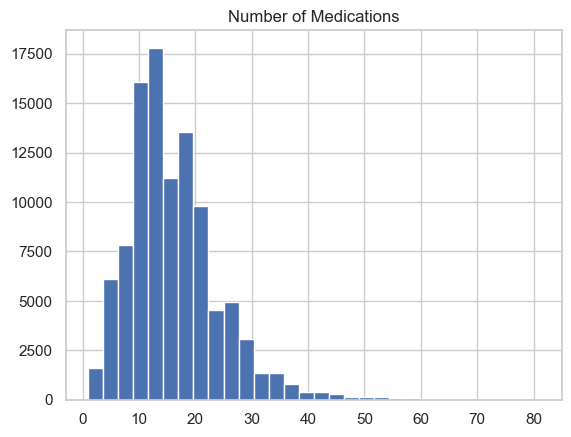

In [20]:
diabetes['num_medications'].hist(bins=30)
plt.title('Number of Medications')

Text(0.5, 1.0, 'Number of Lab Procedures')

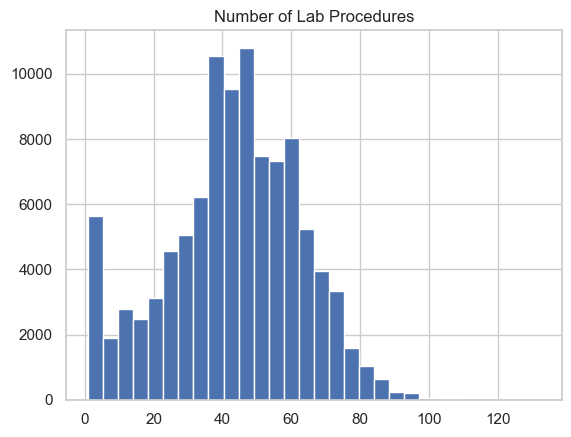

In [21]:
diabetes['num_lab_procedures'].hist(bins=30)
plt.title('Number of Lab Procedures')

3. Bivariate analysis with target: Lets find out how features relate to the target('readmit_30')

Text(0.5, 1.0, 'Readmission by Gender')

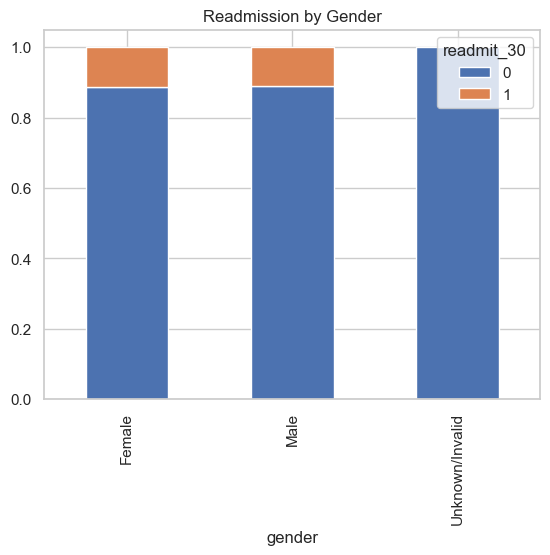

In [22]:
# Categorical features vs target
pd.crosstab(diabetes['gender'], diabetes['readmit_30'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Readmission by Gender')

<Axes: xlabel='readmit_30', ylabel='num_lab_procedures'>

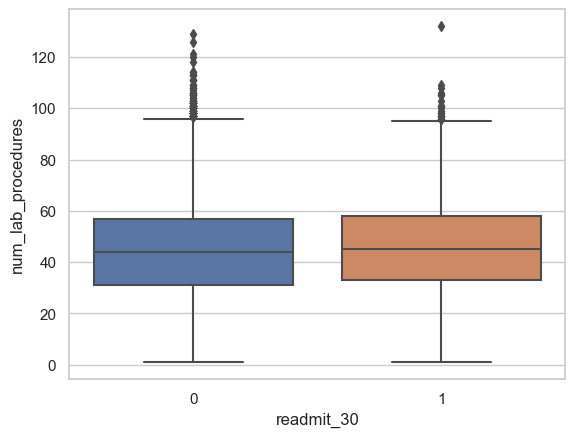

In [23]:
# Numeric features
sns.boxplot(data=diabetes, x='readmit_30', y='num_lab_procedures')

<Axes: >

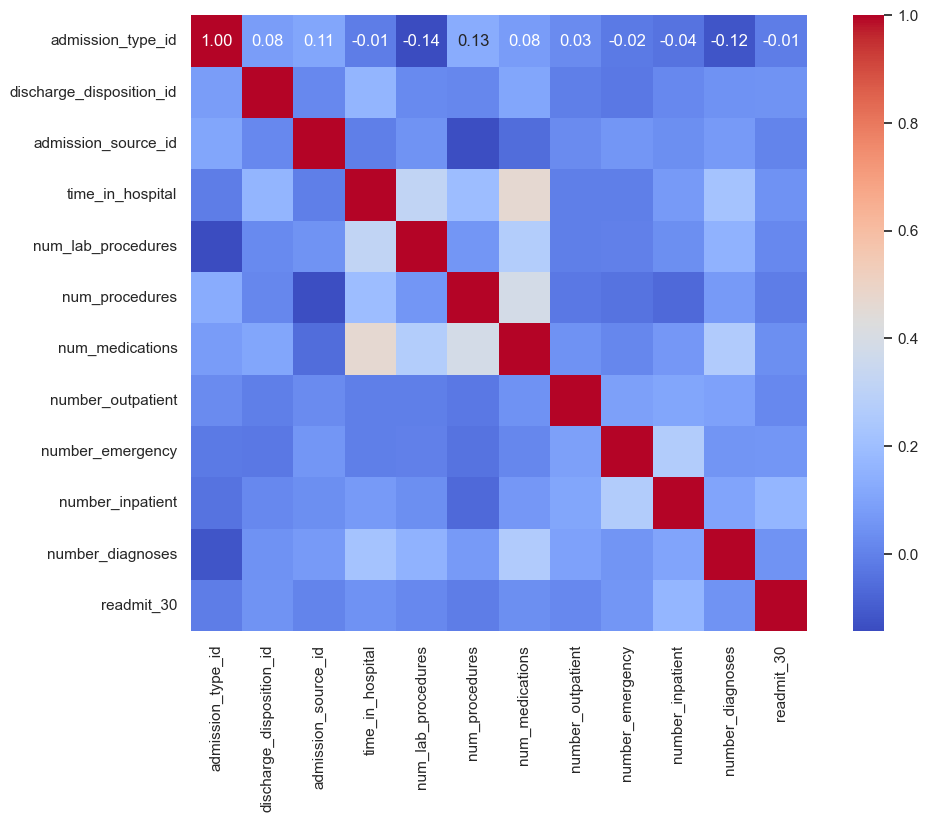

In [24]:
# Correlation matrix
corr_matrix = diabetes.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

Key Observations from the Heatmap
1. Target Variable: readmit_30
Correlation with all features is very weak, ranging between -0.14 and +0.13.

This is expected for many healthcare problems—classification targets are often influenced by complex, nonlinear, and categorical factors, not just numerical ones.

2. Strongest Correlates (Even if Weak)
🔹 number_inpatient vs readmit_30: ≈ 0.13
More inpatient visits → Slightly more chance of readmission.

Makes sense: repeat inpatient cases signal chronic or poorly managed conditions.

🔹 time_in_hospital: ≈ 0.13
Slight positive correlation: longer stays might reflect complications or unstable patients.

🔹 num_medications: ≈ 0.08
Slightly correlated: more meds might indicate complex treatment or comorbidities.

3. Feature Redundancy
Some features correlate with each other:

num_medications vs num_lab_procedures: moderate positive correlation.

number_inpatient, number_outpatient, number_emergency: may reflect healthcare usage pattern.

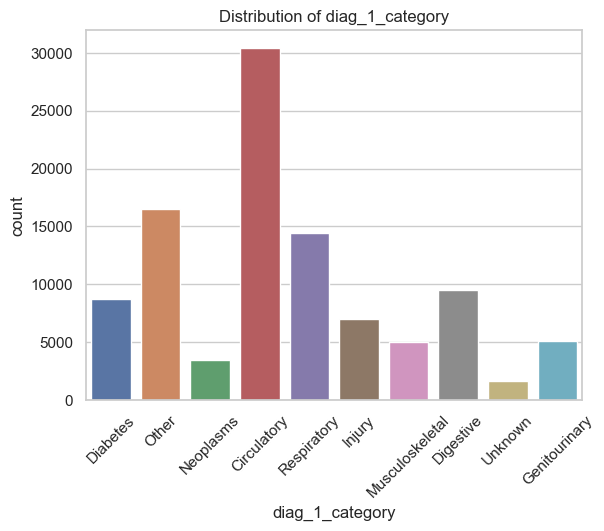

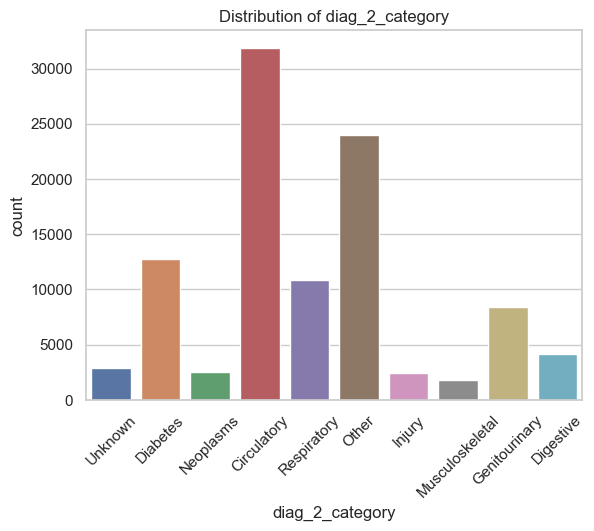

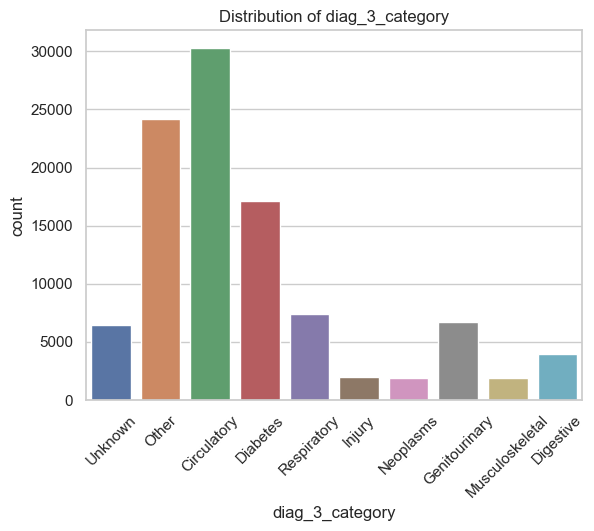

In [25]:
def categorize_diag(code):
    try:
        code = float(code)
        if (390 <= code <= 459) or code == 785:
            return 'Circulatory'
        elif (460 <= code <= 519) or code == 786:
            return 'Respiratory'
        elif (520 <= code <= 579) or code == 787:
            return 'Digestive'
        elif 250 <= code < 251:
            return 'Diabetes'
        elif (800 <= code <= 999):
            return 'Injury'
        elif (710 <= code <= 739):
            return 'Musculoskeletal'
        elif (580 <= code <= 629) or code == 788:
            return 'Genitourinary'
        elif (140 <= code <= 239):
            return 'Neoplasms'
        else:
            return 'Other'
    except:
        return 'Unknown'

for col in ['diag_1', 'diag_2', 'diag_3']:
    diabetes[col + '_category'] = diabetes[col].apply(categorize_diag)
# Visualizing the distribution of diagnosis categories
for col in ['diag_1_category', 'diag_2_category', 'diag_3_category']:
    sns.countplot(data=diabetes, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [26]:
# Convert categorical target to float temporarily
correlation = diabetes.corr(numeric_only=True)['readmit_30'].sort_values(ascending=False)
print(correlation)


readmit_30                  1.000000
number_inpatient            0.165147
number_emergency            0.060747
discharge_disposition_id    0.050560
number_diagnoses            0.049524
time_in_hospital            0.044199
num_medications             0.038432
num_lab_procedures          0.020364
number_outpatient           0.018893
admission_source_id         0.005820
admission_type_id          -0.011651
num_procedures             -0.012227
Name: readmit_30, dtype: float64


### Feature Engineering
On this section well focus on both transformation and creation of new features.
The diagnosis codes were grouped in the section above. 
##### Flagging High-Risk Patient Patterns

In [27]:
diabetes['high_inpatient'] = (diabetes['number_inpatient'] > 1).astype(int)
diabetes['high_emergency'] = (diabetes['number_emergency'] > 1).astype(int)
diabetes['high_outpatient'] = (diabetes['number_outpatient'] > 3).astype(int)


#### Polypharmacy Indicator
This is an indicator for many medications

In [28]:
diabetes['polypharmacy'] = (diabetes['num_medications'] > 10).astype(int)
diabetes['high_lab_procedures'] = (diabetes['num_lab_procedures'] > 40).astype(int)
diabetes['high_procedures'] = (diabetes['num_procedures'] > 5).astype(int)

In [29]:
diabetes['hospital_stay_group'] = pd.cut(
    diabetes['time_in_hospital'],
    bins=[0, 3, 7, 14],
    labels=['Short', 'Medium', 'Long']
)
diabetes['readmit_30'] = diabetes['readmit_30'].astype(int)

We can count how many of the three diagnosis codes fall into "Diabetes" or "Circulatory" showing for chronic burden.

In [30]:
def is_chronic(cat):
    return cat in ['Diabetes', 'Circulatory']

diabetes['num_chronic_diag'] = (
    diabetes['diag_1_category'].apply(is_chronic).astype(int) +
    diabetes['diag_2_category'].apply(is_chronic).astype(int) +
    diabetes['diag_3_category'].apply(is_chronic).astype(int)
)

<Axes: xlabel='num_chronic_diag', ylabel='count'>

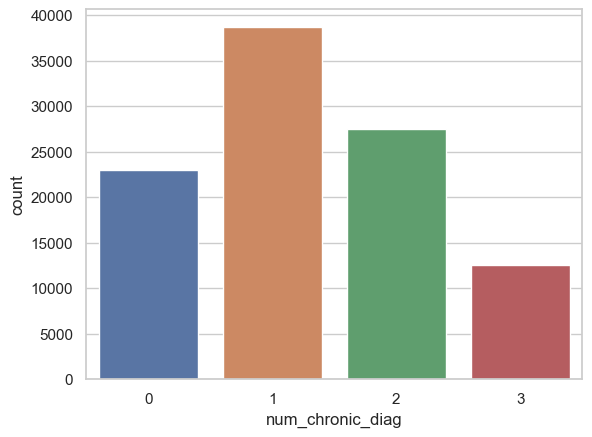

In [31]:
# Visualizing the number of chronic diagnoses
sns.countplot(data=diabetes, x='num_chronic_diag')  

#### Hot Encoding 

In [32]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder

# --- 1. One-Hot Encode Nominal Categorical Columns ---
one_hot_cols = [
    'gender',
    'race',
    'admission_type',           # You must map admission_type_id to labels first if not done
    'hospital_stay_group',
    'diag_1_category',
    'diag_2_category',
    'diag_3_category'
]

# Safely apply one-hot encoding using pandas
diabetes = pd.get_dummies(diabetes, columns=one_hot_cols, drop_first=True)

# --- 2. Label Encode High-Cardinality or Numeric-Coded Categorical Columns ---
label_cols = ['medical_specialty', 'discharge_disposition_id', 'admission_source_id']
le = LabelEncoder()

for col in label_cols:
    diabetes[col] = le.fit_transform(diabetes[col].astype(str))  # ensure strings



KeyError: "['admission_type'] not in index"

In [33]:
diabetes["admission_type_id"]

0         6
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    2
101765    1
Name: admission_type_id, Length: 101766, dtype: int64